# Modele 1

In [57]:
import pandas as pd

# 1. Charger les datasets
learn_main = pd.read_csv("learn_dataset.csv")
city_adm = pd.read_csv("city_adm.csv")
city_loc = pd.read_csv("city_loc.csv")
city_pop = pd.read_csv("city_pop.csv")

# 2. Fusionner learn_main avec toutes les colonnes de city_adm
learn_model1 = learn_main.merge(city_adm, how="left", on="insee_code")

# 3. Fusionner ensuite avec city_loc pour ajouter LAT, LONG, X, Y
learn_model1 = learn_model1.merge(city_loc, how="left", on="insee_code")

# 4. Fusionner avec city_pop pour ajouter le nombre d'habitants
learn_model1 = learn_model1.merge(city_pop, how="left", on="insee_code")

# 5. Vérification
print("✅ Fusion complète avec city_adm, city_loc, city_pop réussie !")
print(learn_model1.head())
learn_model1

✅ Fusion complète avec city_adm, city_loc, city_pop réussie !
   UNIQUE_ID Occupation_42     ACT  DEGREE insee_code     SEX  CURRENT_AGE  \
0          1       csp_5_4  act1-1  DIPL14      01001  Female           54   
1          3       csp_7_7  act2-1  DIPL12      01004  Female           78   
2          5       csp_7_8  act2-1  DIPL13      01004    Male           76   
3          6       csp_3_3  act1-1  DIPL16      01004    Male           43   
4          8       csp_7_8  act2-1  DIPL13      01004    Male           82   

  Familty_type  is_student   target         Nom de la commune  \
0     TYPEM4|1       False  65.8424  L' Abergement-Clémenciat   
1     TYPEM1|2       False  76.4134         Ambérieu-en-Bugey   
2     TYPEM4|4       False  58.6657         Ambérieu-en-Bugey   
3     TYPEM4|2       False  43.7094         Ambérieu-en-Bugey   
4     TYPEM4|4       False  59.8545         Ambérieu-en-Bugey   

          city_type dep              X             Y        LAT      LONG  \
0

,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants
0,1,csp_5_4,act1-1,DIPL14,01001,Female,54,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,3,csp_7_7,act2-1,DIPL12,01004,Female,78,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,5,csp_7_8,act2-1,DIPL13,01004,Male,76,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,6,csp_3_3,act1-1,DIPL16,01004,Male,43,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,8,csp_7_8,act2-1,DIPL13,01004,Male,82,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,csp_8_6,act2-5,DIPL11,95680,Male,72,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49997,99996,csp_8_5,act2-5,DIPL1,95680,Male,59,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49998,99998,csp_2_1,act1-1,DIPL14,95680,Male,56,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49999,99999,csp_6_2,act1-1,DIPL15,95680,Male,47,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917


✅ Variables les plus corrélées avec la cible (target) :
CURRENT_AGE    0.584149
inhabitants   -0.266253
LAT           -0.223483
Y             -0.223257
UNIQUE_ID     -0.112998
X              0.008220
LONG           0.007520
Name: target, dtype: float64


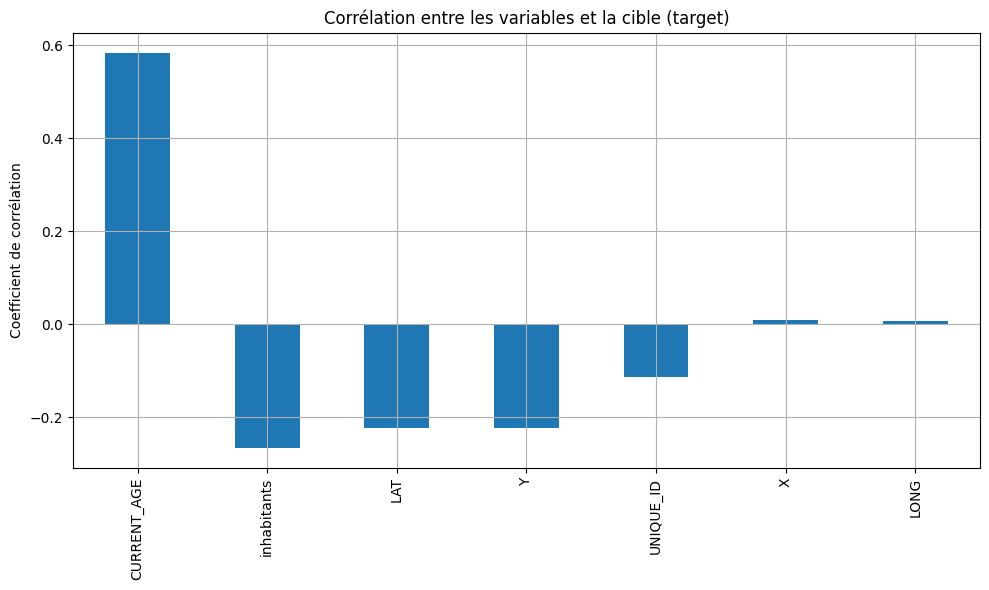

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Supposons que ton dataframe enrichi s'appelle learn_model1
# Si ce n'est pas le cas, ajuste ici
df = learn_model1.copy()

# 2. Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# 3. Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# 4. Extraire uniquement la corrélation avec la 'target'
corr_target = corr_matrix["target"].drop("target").sort_values(key=abs, ascending=False)

# 5. Afficher les variables les plus corrélées avec la target
print("✅ Variables les plus corrélées avec la cible (target) :")
print(corr_target)

# 6. (optionnel) Visualisation en barplot
plt.figure(figsize=(10,6))
corr_target.plot(kind='bar')
plt.title("Corrélation entre les variables et la cible (target)")
plt.ylabel("Coefficient de corrélation")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# ===============================
# 🎓 Regroupement DEGREE
# ===============================
import pandas as pd

# Charger le fichier de correspondance
code_degree = pd.read_csv("code_DEGREE.csv")

# Dictionnaire de regroupement des niveaux de diplôme
degree_group_mapping = {
    "DIPL1": "Sans diplôme",
    "DIPL2": "Sans diplôme",
    "DIPL3": "Sans diplôme",
    "DIPL11": "Primaire",
    "DIPL12": "Collège",
    "DIPL13": "Secondaire pro",
    "DIPL14": "Bac général/techno",
    "DIPL15": "Bac pro",
    "DIPL16": "Bac+2",
    "DIPL17": "Bac+3/4",
    "DIPL18": "Bac+5",
    "DIPL19": "Bac+7"
}

# Appliquer le mapping
learn_model1["DEGREE"] = learn_model1["DEGREE"].map(degree_group_mapping)
learn_model1["DEGREE"] = learn_model1["DEGREE"].fillna("Autre")


# ===============================
# 👶 Regroupement CURRENT_AGE
# ===============================

# S'assurer que les âges sont bien numériques
learn_model1["CURRENT_AGE"] = pd.to_numeric(learn_model1["CURRENT_AGE"], errors='coerce')

# Fonction de regroupement des classes d'âge
def regrouper_age(age):
    if pd.isna(age):
        return "Inconnu"
    elif age < 18:
        return "Mineur"
    elif age < 25:
        return "Jeune adulte"
    elif age < 40:
        return "Adulte"
    elif age < 60:
        return "Senior"
    else:
        return "Vétéran"

# Appliquer le regroupement
learn_model1["CURRENT_AGE"] = learn_model1["CURRENT_AGE"].apply(regrouper_age)
learn_model1

,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants
0,1,csp_5_4,act1-1,Bac général/techno,01001,Female,Senior,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,3,csp_7_7,act2-1,Collège,01004,Female,Vétéran,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,5,csp_7_8,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,6,csp_3_3,act1-1,Bac+2,01004,Male,Senior,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,8,csp_7_8,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,csp_8_6,act2-5,Primaire,95680,Male,Vétéran,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49997,99996,csp_8_5,act2-5,Sans diplôme,95680,Male,Senior,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49998,99998,csp_2_1,act1-1,Bac général/techno,95680,Male,Senior,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49999,99999,csp_6_2,act1-1,Bac pro,95680,Male,Senior,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917


In [60]:
# 1. Chargement du fichier de code
code_occ = pd.read_csv("code_Occupation_42.csv")

# 2. Création d’un mapping simplifié
def simplifier_csp(code):
    if code.startswith("csp_1"):
        return "Agriculteurs"
    elif code.startswith("csp_2"):
        return "Indépendants"
    elif code.startswith("csp_3"):
        return "Cadres"
    elif code.startswith("csp_4"):
        return "Professions intermédiaires"
    elif code.startswith("csp_5"):
        return "Employés"
    elif code.startswith("csp_6"):
        return "Ouvriers"
    elif code.startswith("csp_7"):
        return "Retraités"
    elif code.startswith("csp_8"):
        return "Inactifs / Étudiants"
    else:
        return "Autre"

# 3. Application du mapping
learn_model1["Occupation_42"] = learn_model1["Occupation_42"].astype(str)
learn_model1["Occupation_42"] = learn_model1["Occupation_42"].apply(simplifier_csp)

print("✅ Regroupement de Occupation_42 terminé !")


✅ Regroupement de Occupation_42 terminé !


In [61]:
from scipy.stats import ks_2samp

# 1. Séparer la target en deux groupes : Bas vs Haut
target_bas = learn_model1[learn_model1['dep'] == 'Bas']['target']
target_haut = learn_model1[learn_model1['dep'] != 'Bas']['target']

# 2. Appliquer le K-S test
ks_stat, p_value = ks_2samp(target_bas, target_haut)

# 3. Résultat
print(f"✅ K-S Test terminé :")
print(f"Statistic (D) : {ks_stat:.4f}")
print(f"P-value       : {p_value:.4f}")

# 4. Interprétation rapide
if p_value < 0.05:
    print("💥 Résultat : Les deux distributions sont significativement différentes !")
else:
    print("⚡ Résultat : Pas de différence significative entre les deux groupes.")
# 1. Compter combien de départements sont en 'Bas' et en 'Haut'
dep_counts = learn_model1['dep'].value_counts()

# 2. Calculer les pourcentages
dep_percentages = dep_counts / dep_counts.sum() * 100

# 3. Affichage
print("✅ Répartition Bas / Haut :")
print(dep_percentages)


✅ K-S Test terminé :
Statistic (D) : nan
P-value       : nan
⚡ Résultat : Pas de différence significative entre les deux groupes.
✅ Répartition Bas / Haut :
dep
59    3.903922
75    3.401932
13    3.081938
69    2.799944
93    2.513950
        ...   
15    0.245995
05    0.207996
23    0.195996
90    0.183996
48    0.147997
Name: count, Length: 96, dtype: float64


/var/folders/hl/jsc21d116fq59xp4rvkwtqb80000gn/T/ipykernel_24153/2215386827.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ks_stat, p_value = ks_2samp(target_bas, target_haut)


In [62]:
import pandas as pd

# 1. Calculer la moyenne de target par département
dep_target_mean = learn_model1.groupby('dep')['target'].mean().reset_index()

# 2. Calculer la moyenne générale sur tous les départements
global_mean = dep_target_mean['target'].mean()

print(f"✅ Moyenne générale des départements : {global_mean:.4f}")

# 3. Créer une colonne qui classe en 'Haut' ou 'Bas'
dep_target_mean['dep_category'] = dep_target_mean['target'].apply(lambda x: 'Haut' if x >= global_mean else 'Bas')

# 4. Fusionner cette catégorie avec ton dataframe principal
learn_model1 = learn_model1.merge(dep_target_mean[['dep', 'dep_category']], on='dep', how='left')

# 5. Vérification rapide
print("✅ Catégorisation terminée (haut/bas) :")
print(learn_model1[['dep', 'dep_category']].head())

learn_model1


✅ Moyenne générale des départements : 54.7204
✅ Catégorisation terminée (haut/bas) :
  dep dep_category
0  01         Haut
1  01         Haut
2  01         Haut
3  01         Haut
4  01         Haut


,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants,dep_category
0,1,Employés,act1-1,Bac général/techno,01001,Female,Senior,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785,Haut
1,3,Retraités,act2-1,Collège,01004,Female,Vétéran,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Haut
2,5,Retraités,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Haut
3,6,Cadres,act1-1,Bac+2,01004,Male,Senior,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Haut
4,8,Retraités,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Haut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,Inactifs / Étudiants,act2-5,Primaire,95680,Male,Vétéran,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Bas
49997,99996,Inactifs / Étudiants,act2-5,Sans diplôme,95680,Male,Senior,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Bas
49998,99998,Indépendants,act1-1,Bac général/techno,95680,Male,Senior,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Bas
49999,99999,Ouvriers,act1-1,Bac pro,95680,Male,Senior,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Bas


In [63]:
# 1. Remplacer uniquement les départements "Bas" par le mot "Bas"
learn_model1['dep'] =learn_model1.apply(
    lambda row: 'Bas' if row['dep_category'] == 'Bas' else row['dep'],
    axis=1
)

# 2. (optionnel) Supprimer la colonne dep_category si tu veux faire propre
learn_model1 =learn_model1.drop(columns=['dep_category'])

# 3. Vérification
print("✅ Remplacement uniquement pour 'Bas' terminé !")
print(learn_model1[['dep']].head(20))
learn_model1

✅ Remplacement uniquement pour 'Bas' terminé !
   dep
0   01
1   01
2   01
3   01
4   01
5   01
6   01
7   01
8   01
9   01
10  01
11  01
12  01
13  01
14  01
15  01
16  01
17  01
18  01
19  01


,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants
0,1,Employés,act1-1,Bac général/techno,01001,Female,Senior,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,3,Retraités,act2-1,Collège,01004,Female,Vétéran,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,5,Retraités,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,6,Cadres,act1-1,Bac+2,01004,Male,Senior,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,8,Retraités,act2-1,Secondaire pro,01004,Male,Vétéran,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,Inactifs / Étudiants,act2-5,Primaire,95680,Male,Vétéran,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,Bas,656386.585867,6.878891e+06,49.008449,2.403856,27917
49997,99996,Inactifs / Étudiants,act2-5,Sans diplôme,95680,Male,Senior,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,Bas,656386.585867,6.878891e+06,49.008449,2.403856,27917
49998,99998,Indépendants,act1-1,Bac général/techno,95680,Male,Senior,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,Bas,656386.585867,6.878891e+06,49.008449,2.403856,27917
49999,99999,Ouvriers,act1-1,Bac pro,95680,Male,Senior,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,Bas,656386.585867,6.878891e+06,49.008449,2.403856,27917


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Faire une copie de sécurité du dataset original avant modification
learn_model1_original = learn_model1.copy()

# Colonnes à encoder
categorical_cols = ['CURRENT_AGE', 'DEGREE', 'Occupation_42', 'ACT', 'Familty_type', 'SEX', 'dep', 'city_type']
numeric_cols = ['X', 'Y', 'LAT', 'LONG', 'inhabitants', 'is_student']

# Préparation des données (sans la target)
X = learn_model1_original.drop(columns='target')

# Création du ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Application de la transformation
X_transformed = preprocessor.fit_transform(X)

# Récupération des noms des colonnes encodées
encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
remainder_names = [col for col in X.columns if col not in categorical_cols]
final_columns = list(encoded_cat_names) + remainder_names

# Reconstruction du DataFrame avec le bon nom
learn_model1 = pd.DataFrame(X_transformed, columns=final_columns)
learn_model1['target'] = learn_model1_original['target'].values

print("✅ Encodage terminé avec OneHotEncoder dans learn_model1 !")


✅ Encodage terminé avec OneHotEncoder dans learn_model1 !


In [65]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Extraire les features
X = learn_model1.drop(columns='target')

# 2. Forcer la conversion de toutes les colonnes en numérique
X_numeric = X.apply(pd.to_numeric, errors='coerce')  # tout ce qui ne se convertit pas devient NaN

# 3. Remplacer les NaN (au choix : 0, moyenne, médiane, etc.)
X_numeric = X_numeric.fillna(0)

# 4. Appliquer le scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 5. Recréer le DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# 6. Récupérer la target
y = learn_model1['target']

print("✅ Standardisation réussie sans erreur de type.")


✅ Standardisation réussie sans erreur de type.


In [66]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# 1. Supposons que X_scaled contient tes features normalisées et y ta cible
# Si besoin, X_scaled et y sont déjà prêts

# 2. Calcul de l'information mutuelle
mi_scores = mutual_info_regression(X_scaled, y, random_state=0)

# 3. Mettre les résultats dans un DataFrame pour les classer
mi_scores_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'MI_Score': mi_scores
})

# 4. Trier par score décroissant
mi_scores_df = mi_scores_df.sort_values(by='MI_Score', ascending=False)

# 5. Afficher les résultats
print("✅ Information Mutuelle calculée :")
print(mi_scores_df)


✅ Information Mutuelle calculée :
                      Feature  MI_Score
4         CURRENT_AGE_Vétéran  0.189733
25                 ACT_act2-1  0.189423
22    Occupation_42_Retraités  0.185298
23                 ACT_act1-1  0.132684
39                   SEX_Male  0.123597
..                        ...       ...
5   DEGREE_Bac général/techno  0.000000
99          Nom de la commune  0.000000
86                     dep_84  0.000000
10               DEGREE_Bac+7  0.000000
78                     dep_71  0.000000

[105 rows x 2 columns]


In [67]:
# 🧼 Nettoyage des valeurs extrêmes de la variable target

# Calcul des bornes IQR
Q1 = learn_model1["target"].quantile(0.25)
Q3 = learn_model1["target"].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites acceptables
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Appliquer le clipping
learn_model1["target"] = learn_model1["target"].clip(lower=lower_bound, upper=upper_bound)

print("✅ Valeurs extrêmes (target) traitées avec méthode IQR.")


✅ Valeurs extrêmes (target) traitées avec méthode IQR.


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# 1. Sélectionner les colonnes encodées correspondant aux variables d'origine
features_to_keep = [col for col in X_scaled.columns if col.startswith('Occupation_42_') or
                                                      col.startswith('ACT_') or
                                                      col.startswith('CURRENT_AGE_') or
                                                      col.startswith('Familty_type_') or
                                                      col.startswith('SEX_') or
                                                      col.startswith('DEGREE_') or
                                                      col.startswith('dep_')]

X_selected = X_scaled[features_to_keep]

# 2. Définir le modèle de base
rf = RandomForestRegressor(random_state=42)

# 3. Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],         # Nombre d'arbres
    'max_depth': [5, 10, 15, None],          # Profondeur max
    'max_features': ['sqrt', 'log2', None]   # Nombre de features par split
}

# 4. Configurer la validation croisée K-Fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. Configurer le GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 6. Lancer le GridSearch
grid_search.fit(X_selected, y)

# 7. Afficher les meilleurs paramètres
print("✅ Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# 8. Afficher le meilleur score R²
print("✅ Meilleur R² obtenu :", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   1.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   2.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   2.3s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   2.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   2.1s
[CV] END ...max_depth=5, max_features=log2, n_estimators=100; total time=   0.9s
[CV] END ...max_depth=5, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ...max_depth=5, max

Exception ignored in: <function ResourceTracker.__del__ at 0x1028719e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/Users/rafael/Documents/Projet Data Science/mon_env/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  13.6s


Exception ignored in: <function ResourceTracker.__del__ at 0x1070559e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  14.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x10622d9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  14.3s


Exception ignored in: <function ResourceTracker.__del__ at 0x1023919e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ..max_depth=15, max_features=None, n_estimators=300; total time=  39.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  14.4s


Exception ignored in: <function ResourceTracker.__del__ at 0x105dfd9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END ..max_depth=15, max_features=None, n_estimators=300; total time=  40.9s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=  21.5s


Exception ignored in: <function ResourceTracker.__del__ at 0x102c2d9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   7.1s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=  21.5s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=  21.6s
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=   6.7s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=  22.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time=  21.8s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  14.1s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  14.1s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  13.8s
[CV] END max_depth=None, max_features=log2, n_estimators=200; total time=  13.6s
[CV] END max_depth=None, max

Exception ignored in: <function ResourceTracker.__del__ at 0x1109319e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=None, n_estimators=100; total time=  18.1s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=  18.7s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=  18.0s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=  17.0s
[CV] END max_depth=None, max_features=None, n_estimators=100; total time=  16.9s
[CV] END max_depth=None, max_features=None, n_estimators=200; total time=  34.5s
[CV] END max_depth=None, max_features=None, n_estimators=200; total time=  34.3s
[CV] END max_depth=None, max_features=None, n_estimators=200; total time=  33.9s


Exception ignored in: <function ResourceTracker.__del__ at 0x1058e59e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=None, n_estimators=200; total time=  33.6s
[CV] END max_depth=None, max_features=None, n_estimators=200; total time=  34.1s
[CV] END max_depth=None, max_features=None, n_estimators=300; total time=  45.7s
[CV] END max_depth=None, max_features=None, n_estimators=300; total time=  42.2s


Exception ignored in: <function ResourceTracker.__del__ at 0x1051559e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END max_depth=None, max_features=None, n_estimators=300; total time=  41.2s
[CV] END max_depth=None, max_features=None, n_estimators=300; total time=  31.7s
[CV] END max_depth=None, max_features=None, n_estimators=300; total time=  31.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x1026299e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


✅ Meilleurs hyperparamètres trouvés :
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 300}
✅ Meilleur R² obtenu : 0.7794383828724201


In [70]:
# 1. Faire les prédictions sur le X d'entraînement
y_pred = grid_search.predict(X_selected)

# 2. Créer un DataFrame pour concaténer les résultats
resultats = X_selected.copy()  # On repart de X_selected
resultats['target_reel'] = y.values  # Valeur réelle
resultats['target_predite'] = y_pred  # Valeur prédite

# 3. Vérification
print("✅ Dataset avec valeurs réelles et prédites ajouté :")
print(resultats.head())
resultats

✅ Dataset avec valeurs réelles et prédites ajouté :
   CURRENT_AGE_Adulte  CURRENT_AGE_Jeune adulte  CURRENT_AGE_Mineur  \
0           -0.527518                  -0.32384           -0.217222   
1           -0.527518                  -0.32384           -0.217222   
2           -0.527518                  -0.32384           -0.217222   
3           -0.527518                  -0.32384           -0.217222   
4           -0.527518                  -0.32384           -0.217222   

   CURRENT_AGE_Senior  CURRENT_AGE_Vétéran  DEGREE_Bac général/techno  \
0            1.459033            -0.690275                   2.887431   
1           -0.685385             1.448697                  -0.346329   
2           -0.685385             1.448697                  -0.346329   
3            1.459033            -0.690275                  -0.346329   
4           -0.685385             1.448697                  -0.346329   

   DEGREE_Bac pro  DEGREE_Bac+2  DEGREE_Bac+3/4  DEGREE_Bac+5  ...    dep_79  \
0 

,CURRENT_AGE_Adulte,CURRENT_AGE_Jeune adulte,CURRENT_AGE_Mineur,CURRENT_AGE_Senior,CURRENT_AGE_Vétéran,DEGREE_Bac général/techno,DEGREE_Bac pro,DEGREE_Bac+2,DEGREE_Bac+3/4,DEGREE_Bac+5,...,dep_79,dep_81,dep_82,dep_83,dep_84,dep_88,dep_89,dep_Bas,target_reel,target_predite
0,-0.527518,-0.32384,-0.217222,1.459033,-0.690275,2.887431,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,-1.356941,65.8424,60.217752
1,-0.527518,-0.32384,-0.217222,-0.685385,1.448697,-0.346329,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,-1.356941,76.4134,79.121829
2,-0.527518,-0.32384,-0.217222,-0.685385,1.448697,-0.346329,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,-1.356941,58.6657,61.025237
3,-0.527518,-0.32384,-0.217222,1.459033,-0.690275,-0.346329,-0.275737,2.988755,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,-1.356941,43.7094,43.468894
4,-0.527518,-0.32384,-0.217222,-0.685385,1.448697,-0.346329,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,-1.356941,59.8545,61.025237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,-0.527518,-0.32384,-0.217222,-0.685385,1.448697,-0.346329,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,0.736952,57.3100,56.398390
49997,-0.527518,-0.32384,-0.217222,1.459033,-0.690275,-0.346329,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,0.736952,58.4076,61.033577
49998,-0.527518,-0.32384,-0.217222,1.459033,-0.690275,2.887431,-0.275737,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,0.736952,42.6725,47.989443
49999,-0.527518,-0.32384,-0.217222,1.459033,-0.690275,-0.346329,3.626646,-0.334587,-0.312366,-0.309464,...,-0.076907,-0.079113,-0.063847,-0.130479,-0.089802,-0.077952,-0.071596,0.736952,35.3713,35.312417


# Modele 2

In [21]:
import pandas as pd

# 1. Charger les fichiers nécessaires
learn_main = pd.read_csv("learn_dataset.csv")
learn_job = pd.read_csv("learn_dataset_job.csv")
city_adm = pd.read_csv("city_adm.csv")
city_loc = pd.read_csv("city_loc.csv")
city_pop = pd.read_csv("city_pop.csv")

# 2. Fusion personnes + emploi (via UNIQUE_ID)
learn_model2 = learn_main.merge(learn_job, how='left', on='UNIQUE_ID')

# 3. Fusion avec city_adm (via insee_code)
learn_model2 = learn_model2.merge(city_adm, how='left', on='insee_code')

# 4. Fusion avec city_loc (via insee_code)
learn_model2 = learn_model2.merge(city_loc, how='left', on='insee_code')

# 5. Fusion avec city_pop (via insee_code)
learn_model2 = learn_model2.merge(city_pop, how='left', on='insee_code')

# 6. Vérification
print("✅ Fusion Modèle 2 terminée : learn_model2 créé")
print("Shape :", learn_model2.shape)
print(learn_model2.head())
learn_model2

✅ Fusion Modèle 2 terminée : learn_model2 créé
Shape : (50001, 28)
   UNIQUE_ID Occupation_42     ACT  DEGREE insee_code     SEX  CURRENT_AGE  \
0          1       csp_5_4  act1-1  DIPL14      01001  Female           54   
1          3       csp_7_7  act2-1  DIPL12      01004  Female           78   
2          5       csp_7_8  act2-1  DIPL13      01004    Male           76   
3          6       csp_3_3  act1-1  DIPL16      01004    Male           43   
4          8       csp_7_8  act2-1  DIPL13      01004    Male           82   

  Familty_type  is_student   target  ... Employee_count working_hours  \
0     TYPEM4|1       False  65.8424  ...           tr_3        2028.0   
1     TYPEM1|2       False  76.4134  ...            NaN           NaN   
2     TYPEM4|4       False  58.6657  ...            NaN           NaN   
3     TYPEM4|2       False  43.7094  ...            NaN           NaN   
4     TYPEM4|4       False  59.8545  ...            NaN           NaN   

          Nom de la commu

,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,...,Employee_count,working_hours,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants
0,1,csp_5_4,act1-1,DIPL14,01001,Female,54,TYPEM4|1,False,65.8424,...,tr_3,2028.0,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,3,csp_7_7,act2-1,DIPL12,01004,Female,78,TYPEM1|2,False,76.4134,...,NaN,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,5,csp_7_8,act2-1,DIPL13,01004,Male,76,TYPEM4|4,False,58.6657,...,NaN,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,6,csp_3_3,act1-1,DIPL16,01004,Male,43,TYPEM4|2,False,43.7094,...,NaN,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,8,csp_7_8,act2-1,DIPL13,01004,Male,82,TYPEM4|4,False,59.8545,...,NaN,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,csp_8_6,act2-5,DIPL11,95680,Male,72,TYPEM4|3,False,57.3100,...,NaN,NaN,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49997,99996,csp_8_5,act2-5,DIPL1,95680,Male,59,TYPEM4|1,False,58.4076,...,NaN,NaN,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49998,99998,csp_2_1,act1-1,DIPL14,95680,Male,56,TYPEM1|1,False,42.6725,...,NaN,NaN,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49999,99999,csp_6_2,act1-1,DIPL15,95680,Male,47,TYPEM4|1,False,35.3713,...,tr_4,1617.0,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917


In [22]:
# Vérifier les valeurs manquantes dans learn_model2
missing = learn_model2.isnull().sum()

# Filtrer uniquement les colonnes où il y a au moins 1 valeur manquante
missing = missing[missing > 0].sort_values(ascending=False)

# Affichage
print("✅ Valeurs manquantes détectées :")
print(missing)


✅ Valeurs manquantes détectées :
working_hours       30404
work_description    30333
WORK_CONDITION      30333
activity_sector     30333
job_category        30333
Employer_type       30333
job_dep             30333
TERMS_OF_EMP        30333
pay                 30333
Employee_count      30333
dtype: int64


In [23]:
# 1. Pour les colonnes numériques ➔ remplir avec -1
learn_model2['working_hours'] = learn_model2['working_hours'].fillna(-1)
learn_model2['pay'] = learn_model2['pay'].fillna(-1)
learn_model2['Employee_count'] = learn_model2['Employee_count'].fillna(-1)

# 2. Pour les colonnes catégorielles ➔ remplir avec 'unknown'
cols_categoricals = [
    'work_description', 'WORK_CONDITION', 'activity_sector', 'job_category',
    'Employer_type', 'job_dep', 'TERMS_OF_EMP'
]

learn_model2[cols_categoricals] = learn_model2[cols_categoricals].fillna('unknown')

print("✅ Valeurs manquantes traitées proprement (Modèle 2).")


✅ Valeurs manquantes traitées proprement (Modèle 2).


In [24]:
# 1. S'assurer que la colonne is_student existe
if 'is_student' in learn_model2.columns:
    learn_model2['is_student'] = learn_model2['is_student'].map({True: 1, False: 0, 'True': 1, 'False': 0})
    print("✅ Colonne 'is_student' convertie en 0/1.")
else:
    print("⚠️ La colonne 'is_student' n'existe pas dans learn_model2.")


✅ Colonne 'is_student' convertie en 0/1.


In [25]:
import pandas as pd
from scipy.stats.mstats import winsorize

# 1. Regroupement de CURRENT_AGE
def regrouper_age(age):
    try:
        age = int(age)
        if age < 18:
            return "Mineur"
        elif age < 25:
            return "Jeune adulte"
        elif age < 40:
            return "Adulte"
        elif age < 60:
            return "Senior"
        else:
            return "Vétéran"
    except:
        return "Inconnu"

learn_model2["CURRENT_AGE"] = learn_model2["CURRENT_AGE"].apply(regrouper_age)

# 2. Regroupement de DEGREE
code_degree = pd.read_csv("code_DEGREE.csv")
degree_group_mapping = {
    "DIPL1": "Sans diplôme",
    "DIPL2": "Sans diplôme",
    "DIPL3": "Sans diplôme",
    "DIPL11": "Primaire",
    "DIPL12": "Collège",
    "DIPL13": "Secondaire pro",
    "DIPL14": "Bac général/techno",
    "DIPL15": "Bac pro",
    "DIPL16": "Bac+2",
    "DIPL17": "Bac+3/4",
    "DIPL18": "Bac+5",
    "DIPL19": "Bac+7"
}
learn_model2["DEGREE"] = learn_model2["DEGREE"].map(degree_group_mapping).fillna("Autre")


In [26]:
# 1. Chargement du fichier de code
code_occ = pd.read_csv("code_Occupation_42.csv")

# 2. Création d’un mapping simplifié
def simplifier_csp(code):
    if code.startswith("csp_1"):
        return "Agriculteurs"
    elif code.startswith("csp_2"):
        return "Indépendants"
    elif code.startswith("csp_3"):
        return "Cadres"
    elif code.startswith("csp_4"):
        return "Professions intermédiaires"
    elif code.startswith("csp_5"):
        return "Employés"
    elif code.startswith("csp_6"):
        return "Ouvriers"
    elif code.startswith("csp_7"):
        return "Retraités"
    elif code.startswith("csp_8"):
        return "Inactifs / Étudiants"
    else:
        return "Autre"

# 3. Application du mapping
learn_model2["Occupation_42"] = learn_model2["Occupation_42"].astype(str)
learn_model2["Occupation_42"] = learn_model2["Occupation_42"].apply(simplifier_csp)

print("✅ Regroupement de Occupation_42 terminé !")


✅ Regroupement de Occupation_42 terminé !


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Séparer X et y
X2 = learn_model2.drop(columns=['target'])
y2 = learn_model2['target']

# 2. Identifier les colonnes catégorielles et numériques
cat_cols = X2.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X2.select_dtypes(include=['number', 'bool']).columns.tolist()

# Facultatif : retirer les colonnes inutiles
for col in ['UNIQUE_ID', 'insee_code']:
    if col in num_cols:
        num_cols.remove(col)
    if col in X2.columns:
        X2 = X2.drop(columns=[col])

# 3. Construire le préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

print("✅ OneHotEncoder + StandardScaler prêts !")
print(f"🔹 Colonnes numériques : {len(num_cols)}")
print(f"🔸 Colonnes catégorielles : {len(cat_cols)}")


✅ OneHotEncoder + StandardScaler prêts !
🔹 Colonnes numériques : 8
🔸 Colonnes catégorielles : 18


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# 1. Séparer X2 et y2
X2 = learn_model2.drop(columns=['target', 'UNIQUE_ID', 'insee_code'], errors='ignore')
y2 = learn_model2['target']

# 2. Forcer toutes les colonnes catégorielles/booléennes à être des strings (évite OneHotEncoder crash)
for col in X2.columns:
    if X2[col].dtype in ['object', 'bool']:
        X2[col] = X2[col].astype(str)

# 3. Recalcul des colonnes numériques et catégorielles
cat_cols = X2.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X2.select_dtypes(include=['number']).columns.tolist()

# 4. Préprocesseur : scaler + one-hot
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 5. Pipeline RandomForest
pipeline = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# 6. Grille d’hyperparamètres
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 15, None],
    'model__max_features': ['sqrt', 'log2']
}

# 7. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 8. GridSearchCV
grid_search2 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 9. Entraînement du modèle
grid_search2.fit(X2, y2)

# 10. Résultats
print("✅ Meilleurs hyperparamètres Modèle 2 :")
print(grid_search2.best_params_)
print("✅ Meilleur R² obtenu (Modèle 2) :", grid_search2.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.4s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.3s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.3s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=200; total time=   4.1s
[CV] END model__max_depth=10, model__ma

Exception ignored in: <function ResourceTracker.__del__ at 0x1045659e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/Users/rafael/Documents/Projet Data Science/mon_env/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=100; total time= 3.1min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=100; total time= 3.1min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=100; total time= 3.1min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 6.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x104c8d9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 6.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1031e59e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 6.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1070e59e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1053c19e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.2min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.2min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 6.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x104a619e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 6.1min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.1min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.1min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.3min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.3min


Exception ignored in: <function ResourceTracker.__del__ at 0x102fc99e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.3min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.4min


Exception ignored in: <function ResourceTracker.__del__ at 0x1210e59e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 4.2min


Exception ignored in: <function ResourceTracker.__del__ at 0x1073dd9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104db59e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

✅ Meilleurs hyperparamètres Modèle 2 :
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 200}
✅ Meilleur R² obtenu (Modèle 2) : 0.8487913549131569


In [71]:
import pandas as pd

# 1. Faire les prédictions sur le jeu d'entraînement
y2_pred = grid_search2.predict(X2)

# 2. Créer un DataFrame résultat
resultats_model2 = X2.copy()
resultats_model2['target_reel'] = y2.values
resultats_model2['target_predite'] = y2_pred

resultats_model2


,Occupation_42,ACT,DEGREE,SEX,CURRENT_AGE,Familty_type,is_student,work_description,WORK_CONDITION,activity_sector,...,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants,target_reel,target_predite
0,Employés,act1-1,Bac général/techno,Female,Senior,TYPEM4|1,0,543b,C,GZ,...,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785,65.8424,62.804406
1,Retraités,act2-1,Collège,Female,Vétéran,TYPEM1|2,0,unknown,unknown,unknown,...,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,76.4134,76.532909
2,Retraités,act2-1,Secondaire pro,Male,Vétéran,TYPEM4|4,0,unknown,unknown,unknown,...,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,58.6657,59.487640
3,Cadres,act1-1,Bac+2,Male,Senior,TYPEM4|2,0,unknown,unknown,unknown,...,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,43.7094,46.046002
4,Retraités,act2-1,Secondaire pro,Male,Vétéran,TYPEM4|4,0,unknown,unknown,unknown,...,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,59.8545,59.487640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,Inactifs / Étudiants,act2-5,Primaire,Male,Vétéran,TYPEM4|3,0,unknown,unknown,unknown,...,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,57.3100,56.721464
49997,Inactifs / Étudiants,act2-5,Sans diplôme,Male,Senior,TYPEM4|1,0,unknown,unknown,unknown,...,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,58.4076,56.954867
49998,Indépendants,act1-1,Bac général/techno,Male,Senior,TYPEM1|1,0,unknown,unknown,unknown,...,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,42.6725,42.285148
49999,Ouvriers,act1-1,Bac pro,Male,Senior,TYPEM4|1,0,623g,C,CH,...,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,35.3713,37.067394


# modele 3

In [72]:
# 1. Recharger learn_dataset de base
learn_main = pd.read_csv("learn_dataset.csv")

# 2. Charger sport
learn_sport = pd.read_csv("learn_dataset_sport.csv")

# 3. Charger géographie
city_adm = pd.read_csv("city_adm.csv")
city_loc = pd.read_csv("city_loc.csv")
city_pop = pd.read_csv("city_pop.csv")

# 4. Fusion personnes + sport
learn_model4 = learn_main.merge(learn_sport, how='left', on='UNIQUE_ID')

# 5. Fusion avec city_adm
learn_model4 = learn_model4.merge(city_adm, how='left', on='insee_code')

# 6. Fusion avec city_loc
learn_model4 = learn_model4.merge(city_loc, how='left', on='insee_code')

# 7. Fusion avec city_pop
learn_model4 = learn_model4.merge(city_pop, how='left', on='insee_code')

# 8. Vérification
print("✅ Fusion terminée pour Modèle 4 : learn_model4 prêt.")
print("Shape :", learn_model4.shape)
print(learn_model4.head())
learn_model4

✅ Fusion terminée pour Modèle 4 : learn_model4 prêt.
Shape : (50001, 19)
   UNIQUE_ID Occupation_42     ACT  DEGREE insee_code     SEX  CURRENT_AGE  \
0          1       csp_5_4  act1-1  DIPL14      01001  Female           54   
1          3       csp_7_7  act2-1  DIPL12      01004  Female           78   
2          5       csp_7_8  act2-1  DIPL13      01004    Male           76   
3          6       csp_3_3  act1-1  DIPL16      01004    Male           43   
4          8       csp_7_8  act2-1  DIPL13      01004    Male           82   

  Familty_type  is_student   target SPORTS         Nom de la commune  \
0     TYPEM4|1       False  65.8424    NaN  L' Abergement-Clémenciat   
1     TYPEM1|2       False  76.4134    NaN         Ambérieu-en-Bugey   
2     TYPEM4|4       False  58.6657    NaN         Ambérieu-en-Bugey   
3     TYPEM4|2       False  43.7094    NaN         Ambérieu-en-Bugey   
4     TYPEM4|4       False  59.8545    NaN         Ambérieu-en-Bugey   

          city_type dep  

,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,SPORTS,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants
0,1,csp_5_4,act1-1,DIPL14,01001,Female,54,TYPEM4|1,False,65.8424,NaN,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785
1,3,csp_7_7,act2-1,DIPL12,01004,Female,78,TYPEM1|2,False,76.4134,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
2,5,csp_7_8,act2-1,DIPL13,01004,Male,76,TYPEM4|4,False,58.6657,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
3,6,csp_3_3,act1-1,DIPL16,01004,Male,43,TYPEM4|2,False,43.7094,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
4,8,csp_7_8,act2-1,DIPL13,01004,Male,82,TYPEM4|4,False,59.8545,NaN,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,csp_8_6,act2-5,DIPL11,95680,Male,72,TYPEM4|3,False,57.3100,NaN,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49997,99996,csp_8_5,act2-5,DIPL1,95680,Male,59,TYPEM4|1,False,58.4076,CLUB111,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49998,99998,csp_2_1,act1-1,DIPL14,95680,Male,56,TYPEM1|1,False,42.6725,CLUB101,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917
49999,99999,csp_6_2,act1-1,DIPL15,95680,Male,47,TYPEM4|1,False,35.3713,NaN,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917


In [73]:
import pandas as pd
from scipy.stats.mstats import winsorize

# 1. Regroupement de CURRENT_AGE
def regrouper_age(age):
    try:
        age = int(age)
        if age < 18:
            return "Mineur"
        elif age < 25:
            return "Jeune adulte"
        elif age < 40:
            return "Adulte"
        elif age < 60:
            return "Senior"
        else:
            return "Vétéran"
    except:
        return "Inconnu"

learn_model2["CURRENT_AGE"] = learn_model2["CURRENT_AGE"].apply(regrouper_age)

# 2. Regroupement de DEGREE
code_degree = pd.read_csv("code_DEGREE.csv")
degree_group_mapping = {
    "DIPL1": "Sans diplôme",
    "DIPL2": "Sans diplôme",
    "DIPL3": "Sans diplôme",
    "DIPL11": "Primaire",
    "DIPL12": "Collège",
    "DIPL13": "Secondaire pro",
    "DIPL14": "Bac général/techno",
    "DIPL15": "Bac pro",
    "DIPL16": "Bac+2",
    "DIPL17": "Bac+3/4",
    "DIPL18": "Bac+5",
    "DIPL19": "Bac+7"
}
learn_model4["DEGREE"] = learn_model4["DEGREE"].map(degree_group_mapping).fillna("Autre")


In [74]:
# 1. Chargement du fichier de code
code_occ = pd.read_csv("code_Occupation_42.csv")

# 2. Création d’un mapping simplifié
def simplifier_csp(code):
    if code.startswith("csp_1"):
        return "Agriculteurs"
    elif code.startswith("csp_2"):
        return "Indépendants"
    elif code.startswith("csp_3"):
        return "Cadres"
    elif code.startswith("csp_4"):
        return "Professions intermédiaires"
    elif code.startswith("csp_5"):
        return "Employés"
    elif code.startswith("csp_6"):
        return "Ouvriers"
    elif code.startswith("csp_7"):
        return "Retraités"
    elif code.startswith("csp_8"):
        return "Inactifs / Étudiants"
    else:
        return "Autre"

# 3. Application du mapping
learn_model4["Occupation_42"] = learn_model4["Occupation_42"].astype(str)
learn_model4["Occupation_42"] = learn_model4["Occupation_42"].apply(simplifier_csp)

print("✅ Regroupement de Occupation_42 terminé !")


✅ Regroupement de Occupation_42 terminé !


In [75]:
# 📦 Chargement du fichier code_SPORTS
code_sports = pd.read_csv("code_SPORTS.csv")  # Mets le bon chemin si nécessaire

# 🧠 Création d’un mapping manuel basé sur "Nom fédération"
sport_type_mapping = {
    # Sports collectifs
    "Fédération française de football": "Sport collectif",
    "Fédération française de basketball": "Sport collectif",
    "Fédération française de handball": "Sport collectif",
    "Fédération française de rugby": "Sport collectif",
    "Fédération française de hockey": "Sport collectif",
    "Fédération française de volley-ball": "Sport collectif",
    "Fédération française de baseball et softball": "Sport collectif",
    "Fédération française de hockey sur glace": "Sport collectif",
    "Fédération française de football américain": "Sport collectif",

    # Sports de raquette
    "Fédération française de tennis": "Sport de raquette",
    "Fédération française de badminton": "Sport de raquette",
    "Fédération française de tennis de table": "Sport de raquette",
    "Fédération française de squash": "Sport de raquette",

    # Sports de combat
    "Fédération française de boxe": "Sport de combat",
    "Fédération française de judo-jujitsu et disciplines associées": "Sport de combat",
    "Fédération française de lutte et disciplines associées": "Sport de combat",
    "Fédération française de karaté et disciplines associées": "Sport de combat",
    "Fédération française de kick-boxing, muay-thaï et disciplines associées": "Sport de combat",
    "Fédération française d'aïkido, d'aïkibudo et affinitaires": "Sport de combat",
    "Fédération française des Arts Energétiques et Martiaux Chinois": "Sport de combat",

    # Sports nautiques
    "Fédération française d'aviron": "Sport nautique",
    "Fédération française de natation": "Sport nautique",
    "Fédération française de canoë-kayak": "Sport nautique",
    "Fédération française de voile": "Sport nautique",
    "Fédération française de ski nautique et wake board": "Sport nautique",
    "Fédération française de surf": "Sport nautique",
    "Fédération française de motonautique": "Sport nautique",

    # Sports d’adresse
    "Fédération française de tir": "Sport de précision",
    "Fédération française de tir à l'arc": "Sport de précision",
    "Fédération française de billard": "Sport de précision",
    "Fédération française de pétanque et jeu provençal": "Sport de précision",
    "Fédération française de bowling et de sports de quilles": "Sport de précision",

    # Sports mécaniques
    "Fédération française du sport automobile": "Sport mécanique",
    "Fédération française de motocyclisme": "Sport mécanique",
    "Fédération française d'aéronautique": "Sport mécanique",
    "Fédération française d'aéromodélisme": "Sport mécanique",

    # Sports de montagne/glisse
    "Fédération française de ski": "Sport de montagne",
    "Fédération française des clubs alpins et de montagne": "Sport de montagne",
    "Fédération française de la montagne et de l'escalade": "Sport de montagne",

    # Autres
    "Fédération française d'athlétisme": "Athlétisme",
    "Fédération française de gymnastique": "Gymnastique",
    "Fédération française de danse": "Danse",
    "Fédération française d'équitation": "Équitation",
    "Fédération française de cyclisme": "Cyclisme",
    "Fédération française de roller et skateboard": "Glisse urbaine"
}

# 🧩 Application du mapping (si la fédération n’est pas connue, on met "Autre")
code_sports["sport_type"] = code_sports["Nom fédération"].map(sport_type_mapping).fillna("Autre")

# 📌 Application dans le dataset learn_model4
learn_model4 = learn_model4.merge(code_sports[["Code", "sport_type"]], how="left", left_on="SPORTS", right_on="Code")
learn_model4.drop(columns=["SPORTS", "Code"], inplace=True)
learn_model4.rename(columns={"sport_type": "SPORTS"}, inplace=True)

print("✅ Regroupement des sports terminé !")
learn_model4["SPORTS"].value_counts()
learn_model4

✅ Regroupement des sports terminé !


,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants,SPORTS
0,1,Employés,act1-1,Bac général/techno,01001,Female,54,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785,NaN
1,3,Retraités,act2-1,Collège,01004,Female,78,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,NaN
2,5,Retraités,act2-1,Secondaire pro,01004,Male,76,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,NaN
3,6,Cadres,act1-1,Bac+2,01004,Male,43,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,NaN
4,8,Retraités,act2-1,Secondaire pro,01004,Male,82,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,Inactifs / Étudiants,act2-5,Primaire,95680,Male,72,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,NaN
49997,99996,Inactifs / Étudiants,act2-5,Sans diplôme,95680,Male,59,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Sport collectif
49998,99998,Indépendants,act1-1,Bac général/techno,95680,Male,56,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Athlétisme
49999,99999,Ouvriers,act1-1,Bac pro,95680,Male,47,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,NaN


In [76]:
# Remplacer les valeurs manquantes par "Ne pratique pas de sport"
learn_model4["SPORTS"] = learn_model4["SPORTS"].fillna("Ne pratique pas de sport")

# Vérification finale
print("🎯 Répartition finale des types de sports (avec 'Ne pratique pas de sport') :")
print(learn_model4["SPORTS"].value_counts(dropna=False))


🎯 Répartition finale des types de sports (avec 'Ne pratique pas de sport') :
SPORTS
Ne pratique pas de sport    42386
Autre                        2982
Sport collectif              1716
Sport de raquette             746
Sport de précision            499
Sport de combat               372
Équitation                    302
Sport nautique                298
Sport de montagne             167
Athlétisme                    165
Sport mécanique               145
Gymnastique                    80
Cyclisme                       75
Danse                          37
Glisse urbaine                 31
Name: count, dtype: int64


In [77]:
# 1. Séparer X4 (features) et y4 (cible)
X4 = learn_model4.drop(columns=['target', 'UNIQUE_ID', 'insee_code'], errors='ignore')
y4 = learn_model4['target']

print("✅ Nettoyage terminé pour Modèle 4 :")
print("X4 shape :", X4.shape)
print("y4 shape :", y4.shape)
learn_model4

✅ Nettoyage terminé pour Modèle 4 :
X4 shape : (50001, 16)
y4 shape : (50001,)


,UNIQUE_ID,Occupation_42,ACT,DEGREE,insee_code,SEX,CURRENT_AGE,Familty_type,is_student,target,Nom de la commune,city_type,dep,X,Y,LAT,LONG,inhabitants,SPORTS
0,1,Employés,act1-1,Bac général/techno,01001,Female,54,TYPEM4|1,False,65.8424,L' Abergement-Clémenciat,Commune simple,01,848637.261367,6.563325e+06,46.153426,4.926114,785,Ne pratique pas de sport
1,3,Retraités,act2-1,Collège,01004,Female,78,TYPEM1|2,False,76.4134,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Ne pratique pas de sport
2,5,Retraités,act2-1,Secondaire pro,01004,Male,76,TYPEM4|4,False,58.6657,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Ne pratique pas de sport
3,6,Cadres,act1-1,Bac+2,01004,Male,43,TYPEM4|2,False,43.7094,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Ne pratique pas de sport
4,8,Retraités,act2-1,Secondaire pro,01004,Male,82,TYPEM4|4,False,59.8545,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723216,6.542887e+06,45.960848,5.372926,14557,Ne pratique pas de sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,99994,Inactifs / Étudiants,act2-5,Primaire,95680,Male,72,TYPEM4|3,False,57.3100,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Ne pratique pas de sport
49997,99996,Inactifs / Étudiants,act2-5,Sans diplôme,95680,Male,59,TYPEM4|1,False,58.4076,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Sport collectif
49998,99998,Indépendants,act1-1,Bac général/techno,95680,Male,56,TYPEM1|1,False,42.6725,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Athlétisme
49999,99999,Ouvriers,act1-1,Bac pro,95680,Male,47,TYPEM4|1,False,35.3713,Villiers-le-Bel,Chef-lieu canton,95,656386.585867,6.878891e+06,49.008449,2.403856,27917,Ne pratique pas de sport


In [78]:
# 1. Conversion spéciale pour 'is_student'
if 'is_student' in X4.columns:
    X4['is_student'] = X4['is_student'].map({True: 1, False: 0, 'True': 1, 'False': 0})

# 2. Forcer toutes les autres colonnes object/bool en string
for col in X4.columns:
    if X4[col].dtype in ['object', 'bool']:
        if col != 'is_student':  # NE PAS refaire is_student
            X4[col] = X4[col].astype(str)

print("✅ 'is_student' converti en numérique, autres colonnes en string.")



✅ 'is_student' converti en numérique, autres colonnes en string.


In [79]:
# 3. Recalculer les colonnes numériques et catégorielles
cat_cols4 = X4.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols4 = X4.select_dtypes(include=['number']).columns.tolist()

print("✅ Détection des colonnes faite pour Modèle 4 :")
print(f"🔹 Colonnes numériques : {len(num_cols4)} ➔ {num_cols4}")
print(f"🔸 Colonnes catégorielles : {len(cat_cols4)} ➔ {cat_cols4}")


✅ Détection des colonnes faite pour Modèle 4 :
🔹 Colonnes numériques : 7 ➔ ['CURRENT_AGE', 'is_student', 'X', 'Y', 'LAT', 'LONG', 'inhabitants']
🔸 Colonnes catégorielles : 9 ➔ ['Occupation_42', 'ACT', 'DEGREE', 'SEX', 'Familty_type', 'Nom de la commune', 'city_type', 'dep', 'SPORTS']


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 4. Créer le préprocesseur
preprocessor4 = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols4),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols4)
])

print("✅ Préprocesseur créé pour Modèle 4 (OneHot + Scaler).")


✅ Préprocesseur créé pour Modèle 4 (OneHot + Scaler).


In [81]:
from scipy.stats.mstats import winsorize

# Winsorization de la variable cible (par exemple, sur les 1% extrêmes)
learn_model4["Target"] = winsorize(learn_model4["target"], limits=[0.01, 0.01])


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# 5. Construire le pipeline complet
pipeline4 = Pipeline(steps=[
    ('preproc', preprocessor4),
    ('model', RandomForestRegressor(random_state=42))
])

# 6. Définir la grille d’hyperparamètres
param_grid4 = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 15, None],
    'model__max_features': ['sqrt', 'log2']
}

# 7. Validation croisée
cv4 = KFold(n_splits=5, shuffle=True, random_state=42)

# 8. GridSearchCV
grid_search4 = GridSearchCV(
    estimator=pipeline4,
    param_grid=param_grid4,
    cv=cv4,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 9. Entraînement
grid_search4.fit(X4, y4)

# 10. Résultats
print("✅ Meilleurs hyperparamètres Modèle 4 :")
print(grid_search4.best_params_)
print("✅ Meilleur R² obtenu (Modèle 4) :", grid_search4.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__n_estimators=100; total time=   2.4s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.1s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.2s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=log2, model__n_estimators=100; total time=   1.1s


Exception ignored in: <function ResourceTracker.__del__ at 0x1070159e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
/Users/rafael/Documents/Projet Data Science/mon_env/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 5.5min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 5.5min


Exception ignored in: <function ResourceTracker.__del__ at 0x1069319e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 5.6min
[CV] END model__max_depth=None, model__max_features=sqrt, model__n_estimators=200; total time= 5.6min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=100; total time= 3.0min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.1min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x1100559e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x1035fd9e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 5.1min
[CV] END model__max_depth=None, model__max_features=log2, model__n_estimators=200; total time= 4.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x1045a99e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106cd19e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

✅ Meilleurs hyperparamètres Modèle 4 :
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 200}
✅ Meilleur R² obtenu (Modèle 4) : 0.8334403757558663


In [85]:
import joblib

# Sauvegarde des datasets
learn_model1.to_csv("learn_model1.csv", index=False)
learn_model2.to_csv("learn_model2.csv", index=False)
learn_model4.to_csv("learn_model4.csv", index=False)


# 1. Sauvegarder les objets GridSearchCV complets (et non juste le .best_estimator_)
joblib.dump(grid_search, "model1.pkl")     # modèle 1
joblib.dump(grid_search2, "model2.pkl")    # modèle 2
joblib.dump(grid_search4, "model4.pkl")    # modèle 4

print("✅ Modèles enregistrés avec validation croisée (GridSearchCV complets).")


print("✅ Tous les modèles ont été enregistrés en .pkl : model1.pkl, model2.pkl, model4.pkl")


print("✅ Fichiers CSV et modèles PKL enregistrés dans le dossier courant.")


✅ Modèles enregistrés avec validation croisée (GridSearchCV complets).
✅ Tous les modèles ont été enregistrés en .pkl : model1.pkl, model2.pkl, model4.pkl
✅ Fichiers CSV et modèles PKL enregistrés dans le dossier courant.
